Noise Addition  
ref: https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

In [2]:
import librosa
def load_audio(file_path, sr=44100):
    y, sr = librosa.load(file_path, sr=sr)
    return y, sr

In [1]:
import numpy as np
import math
SNR = 20 # optimal SNR

def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [3]:
def signal_with_noise(signal,SNR):
    noise = get_white_noise(signal,SNR)
    return signal + noise

In [122]:
test_audio_path = './聲音資料/鯨魚/M3'

In [125]:
signal , sr = load_audio(test_audio_path)
signal_noise = signal_with_noise(signal, SNR)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
spec = librosa.feature.melspectrogram(y=signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Original Signal')

plt.subplot(1,2,2)
spec = librosa.feature.melspectrogram(y=signal_noise)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Noise Signal')

Change Pitch  
ref:https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

In [24]:
# 這邊不知道怎麼設，就用預設值
def manipulate(data, sampling_rate=22050, n_steps=4):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

In [63]:
signal_modified_pitch = manipulate(signal, sr)

Text(0.5, 1.0, 'Noise Signal')

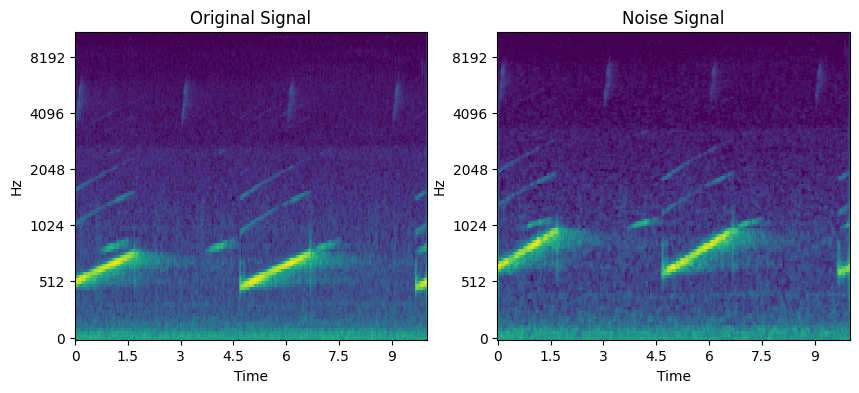

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
spec = librosa.feature.melspectrogram(y=signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Original Signal')

plt.subplot(1,2,2)
spec = librosa.feature.melspectrogram(y=signal_modified_pitch)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Noise Signal')

Time stretch (speed up)

In [3]:
def speed_change(data, speed_factor=1.0):
    return librosa.effects.time_stretch(data, rate=speed_factor)

In [28]:
speed_up_signal = speed_change(signal, 1.5)

Text(0.5, 1.0, 'Noise Signal')

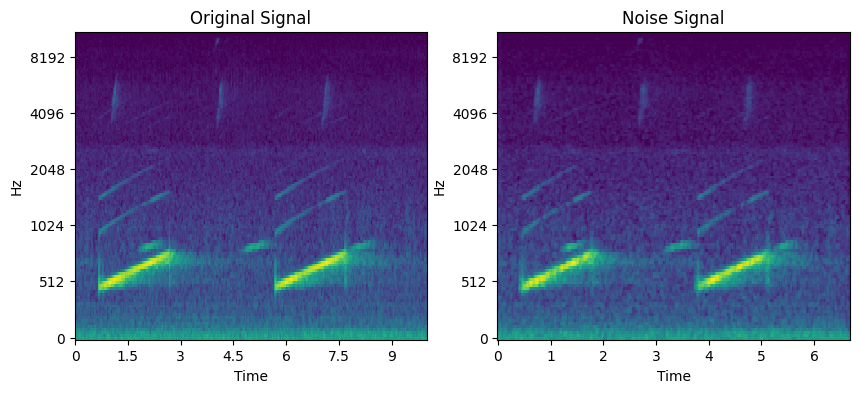

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
spec = librosa.feature.melspectrogram(y=signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Original Signal')

plt.subplot(1,2,2)
spec = librosa.feature.melspectrogram(y=speed_up_signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Noise Signal')

更新 - 0827  
因為鯨魚資料不夠，用倍速方式增加資料

In [14]:
import os
import matplotlib.pyplot as plt
from observe_audio_function import denoise
SAMPLE_RATE = 44100
N_MELS = 128     # freq axis
N_FFT = 2048
HOP_LEN = 512    # non-overlap region, which means 1/4 portion overlapping
FMAX = SAMPLE_RATE//2   # max frequency
audios = [file for file in os.listdir('./聲音資料/鯨魚/M3')]

for file in audios:
    audio_path = os.path.join('./聲音資料/鯨魚/M3', file)
    # load audio
    signal, sr = load_audio(audio_path, SAMPLE_RATE)
    # speed up audio
    speed_change_signal = speed_change(signal, 1.5)
    # denoise the feature
    speed_change_signal = denoise(speed_change_signal)
    # plot spectrogram
    spec = librosa.feature.melspectrogram(y=speed_change_signal, sr=SAMPLE_RATE, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    spec = librosa.power_to_db(spec)
    fig = librosa.display.specshow(spec, sr=SAMPLE_RATE, hop_length=HOP_LEN,  x_axis='time', y_axis='mel', cmap='viridis')
    filename = os.path.split(audio_path)[-1]    # Extract the filename from the path
    plt.title(f"Spectrogram_" + filename, fontsize=17)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save the spectrogram image with a meaningful filename
    save_filepath = os.path.join('./聲音資料/鯨魚/M3', "TimeStrect_" + filename.replace(".wav", ".png"))
    plt.savefig(save_filepath)
    plt.close()

Time shifting  
Here, I used `circular shift`

In [30]:
def shift(data, shift_amount=5):
    return np.roll(data, shift_amount)

In [89]:
shift_signal = shift(signal, 3000)

Text(0.5, 1.0, 'Noise Signal')

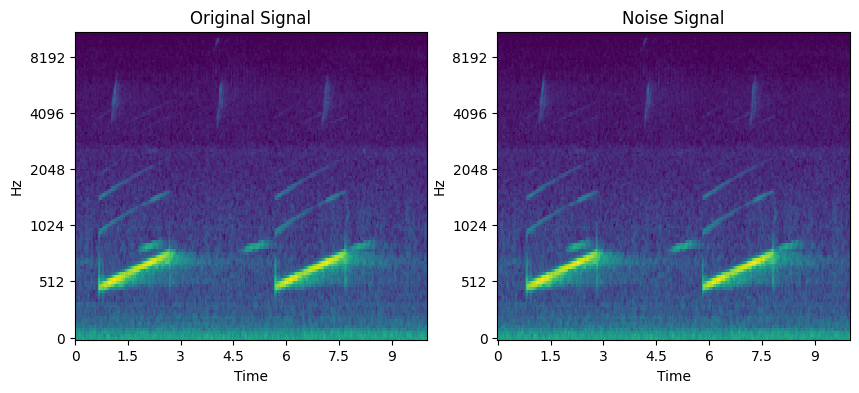

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
spec = librosa.feature.melspectrogram(y=signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Original Signal')

plt.subplot(1,2,2)
spec = librosa.feature.melspectrogram(y=shift_signal)
spec = librosa.power_to_db(spec)
fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', cmap='viridis')
plt.title('Noise Signal')

In [40]:
import soundfile as sf
def write_audio(file_path, data, sr=22050):
    sf.write(file_path, data, sr)

In [99]:
output_file_path1 = './聲音資料/海豚/Noise_20230820_112806.wav'
output_file_path2 = './聲音資料/海豚/Pitch_20201016_070812.wav'
output_file_path3 = './聲音資料/海豚/Shift_20201016_214512.wav'

In [102]:
write_audio(output_file_path1, signal_noise, sr)